### Data Mining

##### Lab 5

###### Matric: 17201091/1
###### Name: LIU,HONGYANG

# 1. Preparing data for clustering

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt

In [2]:
#read file
df = pd.read_csv('lab3.csv')
df.head()

,ID,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz
0,00601,-66.749472,18.180103,70.0,19143,9888,3.24
1,00602,-67.180247,18.363285,83.0,42042,11384,3.10
2,00603,-67.134224,18.448619,86.0,55592,10748,2.84
3,00604,-67.136995,18.498987,83.0,3844,31199,3.00
4,00606,-66.958807,18.182151,65.0,6449,9243,3.20


In [3]:
#describe RegPop
df.describe()

,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz
count,33178.000000,33178.000000,32165.000000,33178.000000,33178.000000,33178.000000
mean,-91.084343,38.830389,50.500016,8596.977395,38248.093857,2.500710
std,15.070689,5.359397,28.865519,12978.758221,17469.135891,0.595747
min,-176.636755,17.962234,1.000000,0.000000,0.000000,0.000000
25%,-97.219483,35.383955,26.000000,656.000000,28903.750000,2.360000
50%,-88.308757,39.460478,51.000000,2515.000000,35762.000000,2.550000
75%,-80.380665,42.105602,75.000000,11167.500000,45229.250000,2.740000
max,-65.292575,71.299525,100.000000,144024.000000,200001.000000,8.490000


In [4]:
# fill nan  and typecast it into the correct float
df['RegDens'] = df['RegDens'].fillna(np.nan).astype(float)

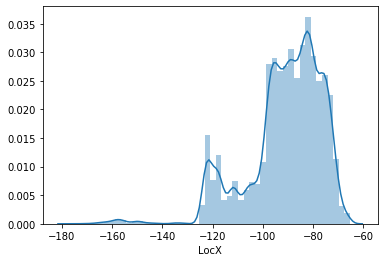

In [5]:
# Plot the distribution
locx = sns.distplot(df['LocX'])

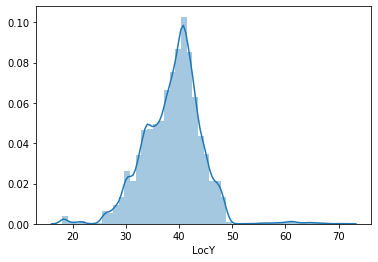

In [6]:
locy = sns.distplot(df['LocY'])

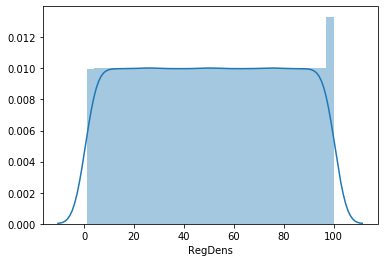

In [7]:
regdens = sns.distplot(df['RegDens'].dropna())

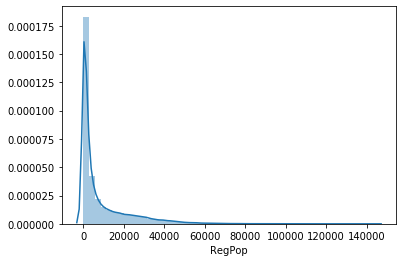

In [8]:
regpop = sns.distplot(df['RegPop'])

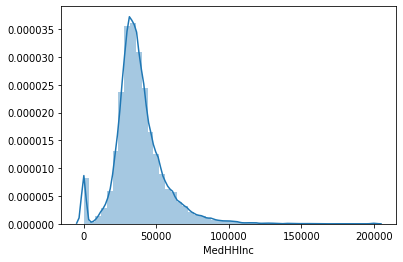

In [9]:
MedHHInc = sns.distplot(df['MedHHInc'])

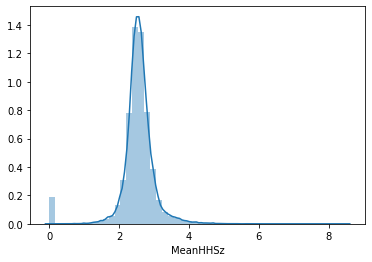

In [10]:
MeanHHSz = sns.distplot(df['MeanHHSz'])

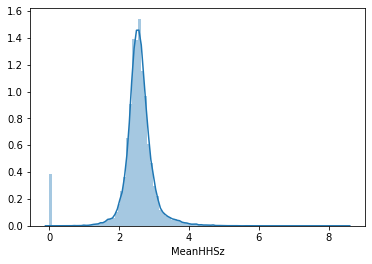

In [11]:
# zoom in  the bins too 100
ax = sns.distplot(df['MeanHHSz'], bins = 100)

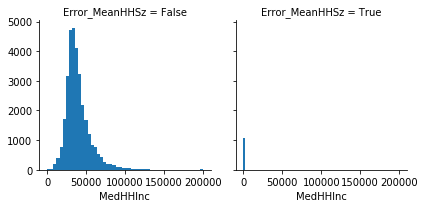

In [12]:
#FacetGrid shows that errorneous data in MeanHHSz are correlated with errorneous data in other features. 
#This serves as a good reason to eliminate all rows with errorneous MeanHHSz.

df['Error_MeanHHSz'] = df['MeanHHSz'] < 1
g = sns.FacetGrid(df, col='Error_MeanHHSz')
g = g.map(plt.hist, 'MedHHInc', bins=50)

plt.show()

# 2. Building your first K-means clustering

In [13]:
#data preprocessing
df = df[df['MeanHHSz'] >= 1]

print("Row After preprocessing", len(df))

Row After preprocessing 32079


In [14]:
# Building your first K-means clustering
clustering_data = df[["MedHHInc", "MeanHHSz", "RegDens"]]

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(clustering_data)
kmeans.labels_
# add ClusterId
clustering_data["ClusterID"] = kmeans.predict(clustering_data)

/Users/liuhongyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
# how many records are in each cluster
print("Cluster membership")
print(clustering_data['ClusterID'].value_counts())

Cluster membership
4    13706
2     8502
1     6729
3     2663
0      479
Name: ClusterID, dtype: int64


In [17]:
#values of centroids.
centroids = kmeans.cluster_centers_
print(centroids)

[[1.10075038e+05 2.79797071e+00 7.80815900e+01]
 [4.93329196e+04 2.63925837e+00 6.12551005e+01]
 [2.44288485e+04 2.53112519e+00 4.08103954e+01]
 [6.95600849e+04 2.70900413e+00 7.49736941e+01]
 [3.58604695e+04 2.56264195e+00 4.54626332e+01]]


# 3. Understanding and Visualising Your Clustering Model

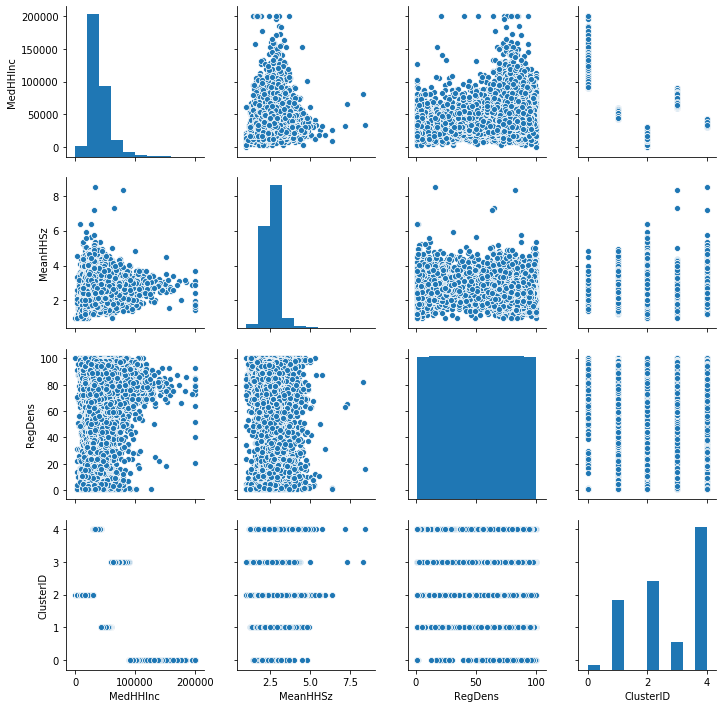

In [20]:
# use seaborn's pairplot to see how the clusters are spread out
ax = sns.pairplot(clustering_data)

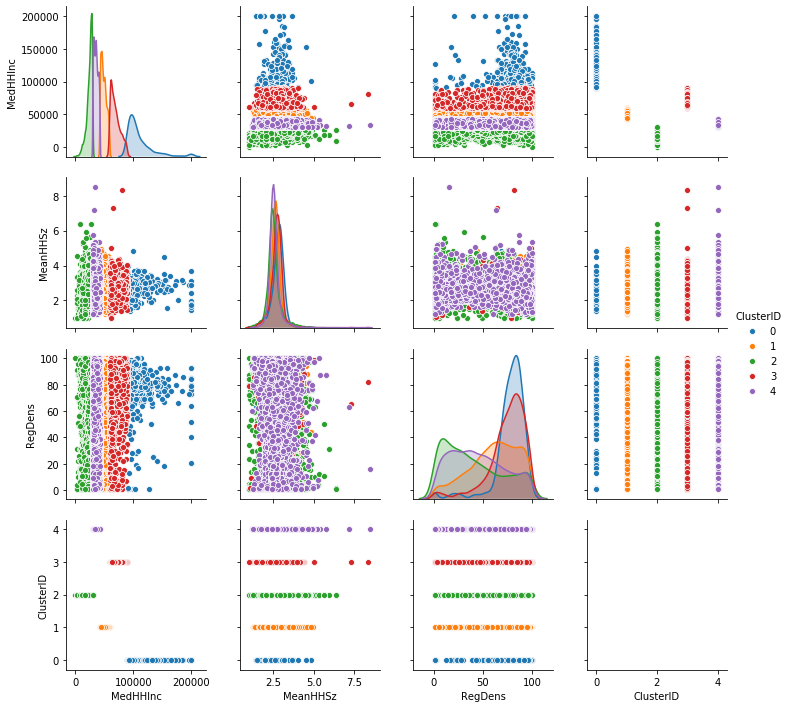

In [21]:
# pairplot the cluster distribution.
cluster_g = sns.pairplot(clustering_data, hue='ClusterID')
plt.show()